<a href="https://colab.research.google.com/github/Taeu/FPO/blob/master/MIS_S_F_DAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install finance-datareader

In [0]:
import urllib.request
import json
import pandas as pd
from bs4 import BeautifulSoup
import urllib
from urllib import request
import re
import numpy as np
import datetime
client_id = 'haQoQuQqDY8FwcshDiBY'
client_secret = ###

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
file_path = 'gdrive/My Drive/Colab Notebooks/kospi200_구성종목_주가_시가총액등'
file_name1 = 'kospi200_pdf_comp_20140101_20190931.xlsx'
file_name2 = 'kospi200_pdf_mkt_cap_201401_201909.xlsx'
file_name3 = 'kospi200_pdf_mkt_weight_201401_201909.xlsx'
kp200 = pd.read_excel(file_path+'/'+file_name1)
kp200_codes_list = kp200[:200].code
len(kp200_codes_list)
kp200_codes_list = kp200_codes_list.tolist()
kp200_names_list =kp200[:200].name.tolist()
kp_informations = pd.read_excel(file_path+'/'+'상장법인목록.xlsx')
kp_informations.head(3)

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,하나금융14호스팩,332710,금융 지원 서비스업,기업인수합병,2019-11-01,12월,홍지헌,NaN,서울특별시
1,신한제6호스팩,333050,금융 지원 서비스업,기업인수 및 합병,2019-10-31,12월,김남엽,NaN,서울특별시
2,티라유텍,322180,소프트웨어 개발 및 공급업,스마트팩토리 솔루션,2019-10-31,12월,"김정하, 조원철",http://thirautech.com,서울특별시


In [0]:
kp_company_name_list = kp_informations['회사명'].tolist()
kp200  = []
for a in kp_company_name_list:
  if a in kp200_names_list:
    kp200.append(a)
len(kp200)

# 1번째 crowling test

In [0]:
def get_trend(body):
    url = "https://openapi.naver.com/v1/datalab/search"

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type", "application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))

    return json.loads(response.read().decode('utf-8'))
body = {
    "startDate": "2019-01-01",
    "endDate": "2019-08-31",
    "timeUnit": "date",
    "keywordGroups": [
        {"groupName": "삼성", "keywords": ["삼성", "Samsung"]},
    ],
}
body = json.dumps(body, indent=4, ensure_ascii=False)
result = get_trend(body)

In [0]:
data = pd.DataFrame.from_dict(result['results'][0]['data'])
data = data.rename(columns = {'period':'Time','ratio':1})
data['Time'] = pd.to_datetime(data['Time'],format = '%Y-%m-%d')
data.Time.dtype
data.tail()

In [0]:
from datetime import datetime

data = result['results'][0]['data']
time = np.array([datetime.strptime(i['period'],'%Y-%m-%d') for i in data])

value = np.array([i['ratio'] for i in data])
data = pd.DataFrame({'Time':time, 'Trend_index' : value})

<Figure size 432x288 with 0 Axes>

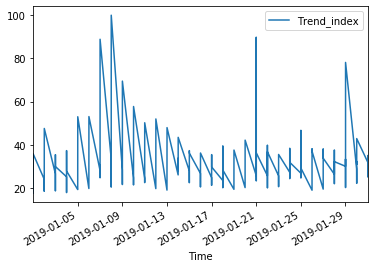

In [0]:
import matplotlib.pyplot as plt

plt.figure(); data.plot(x='Time',y='Trend_index');plt.legend(loc='best')

In [0]:
# 조금 더 자동화를 위해서 body_dict 를 새롭게 구성

In [0]:
print(len(kp_informations))
kp_informations_names = kp_informations.회사명.values.tolist()
idx = 0
drop_idx = []
i = 0
for name in kp_informations_names:
  if name not in kp200_names_list:
    drop_idx.append(i)
  i+=1
print(len(drop_idx))
kp200_inform = kp_informations.drop(drop_idx)
len(kp200_inform)

2323
2167


156

In [0]:
# 자동화를 위해, 그리고 같은 스케일을 가져오기 위해 하나씩 분석
from tqdm import tqdm

names = kp200_inform.회사명.values
body_dict = {
    "startDate": "2019-01-01",
    "endDate": "2019-08-31",
    "timeUnit": "date",
}


for idx in tqdm(range(len(names))): # names
  name = names[idx]
  body_dict['keywordGroups'] = [{'groupName': name,'keywords':[name]}]
  body= json.dumps(body_dict)
  result = get_trend(body)
  
  if idx == 0 :
    data = result['results'][0]['data']
    time = np.array([datetime.strptime(i['period'],'%Y-%m-%d') for i in data])
    value = np.array([i['ratio'] for i in data])
    data = pd.DataFrame({'Time':time, idx : value})
  elif idx >= 1 : 
    data1 = result['results'][0]['data']
    time = np.array([datetime.strptime(i['period'],'%Y-%m-%d') for i in data1])
    value = np.array([i['ratio'] for i in data1])
    data1 = pd.DataFrame({'Time':time, idx : value})
    data = pd.merge(data,data1,on = ['Time'], sort= False)

100%|██████████| 156/156 [02:21<00:00,  1.11it/s]


In [0]:
data

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,2019-01-01,12.65116,9.91541,7.60380,5.71428,8.04280,9.69888,5.34029,2.82054,9.14159,6.47075,0.95533,4.01958,24.12153,1.90487,7.48644,47.50780,8.91211,5.51148,0.11460,3.98622,2.20421,14.15357,16.01595,4.02584,19.53422,4.05591,1.18348,5.66711,20.73976,10.59883,83.89713,8.39822,5.67237,7.09538,10.01005,1.20662,9.40427,0.15470,13.28932,...,0.65943,9.20528,8.61698,18.14958,12.71446,5.25219,0.17194,12.68598,0.99544,2.03331,1.37343,7.97448,17.37783,1.67245,0.31215,1.59397,9.95145,24.27656,19.46266,7.81045,3.13683,4.84121,10.24071,15.03461,7.26585,4.52914,0.17145,0.19447,24.71443,6.40691,3.98810,12.79563,18.77731,31.26100,15.74803,7.28627,9.50734,13.66333,0.13091,22.62589
1,2019-01-02,45.34883,37.07706,20.66033,23.73626,11.36808,28.54025,13.23027,9.89998,44.65481,20.51244,3.39674,23.57639,66.20871,11.50762,43.50611,22.17972,67.12437,23.31343,0.53898,11.84997,11.49432,61.60063,74.40957,16.01606,44.64512,29.94477,2.30944,19.46021,53.69881,42.36883,91.07535,46.42658,19.02200,33.01598,40.74405,2.53108,24.02113,0.71731,64.46644,...,3.66816,43.70201,41.54400,60.01959,50.89170,14.04442,0.28535,50.19577,4.42105,11.02012,6.16345,44.33811,40.57123,8.10981,1.05313,4.29146,28.39805,56.90140,69.53834,31.66666,8.07193,7.15869,46.53097,71.86943,48.07437,36.50224,1.09110,0.84008,54.01523,18.23090,36.84587,32.32261,3.54301,49.32878,74.89063,41.43595,41.22731,23.95103,0.47350,63.08789
2,2019-01-03,44.23255,41.82330,18.52926,23.51648,12.11598,28.69299,16.68339,10.83267,45.11557,22.66936,3.08775,22.85493,65.86525,10.59135,60.63311,24.09119,73.60028,26.31449,0.49762,11.25203,25.49108,57.85519,63.91489,14.37429,52.55069,31.13565,2.23622,18.04929,53.79788,36.77795,88.03630,48.26195,18.28850,34.83024,58.63032,2.36721,25.61854,0.91533,52.09387,...,3.78654,58.94228,42.96228,63.50020,66.46833,13.92873,0.32232,63.19498,7.17882,12.27619,6.35641,57.73524,58.92980,9.65604,1.27526,3.88859,29.24757,67.22151,63.60998,32.05882,7.65278,6.88148,54.95102,69.41641,56.25275,36.03139,1.22359,0.75992,55.68535,16.18824,34.70860,33.53547,2.52614,44.91637,75.59055,41.28384,39.32584,21.48970,0.41099,83.46609
3,2019-01-04,41.81395,37.59398,20.75037,26.15384,12.33459,28.76936,15.43866,9.38307,44.41088,21.54748,3.13504,22.57150,58.17701,11.21827,50.51330,23.84381,66.81431,34.90064,0.48180,11.86809,15.99351,50.83390,58.28191,13.80665,48.20975,29.42699,2.04011,19.19676,52.84015,40.32856,88.03630,48.49833,19.26650,32.85432,51.22332,2.28190,28.18880,0.87838,46.06527,...,3.46541,56.92351,37.77215,64.13007,63.82385,14.16011,0.28439,55.67736,6.61842,10.56210,5.22133,51.99362,59.29112,8.93026,1.15466,4.39656,30.33980,58.74519,56.44550,37.22222,7.74743,6.06981,52.40850,71.79030,48.98199,35.85201,0.95861,0.64514,53.61716,17.48402,34.25691,34.74833,3.27081,41.19718,69.55380,39.50410,42.95592,21.17242,0.49377,81.34307
4,2019-01-05,16.41860,11.37218,5.96298,6.81318,5.59199,10.45166,7.16723,3.01157,10.34963,6.11609,0.96058,4.53491,19.41875,2.04955,33.82015,25.02105,10.63961,7.64576,0.12770,5.20021,2.92382,13.91450,16.18085,3.30102,24.82572,4.79806,1.13432,5.47391,22.58916,10.46634,79.18041,9.84427,7.23716,9.16112,12.91475,1.20785,10.12490,0.19767,14.75614,...,0.70758,11.45862,10.11959,16.11067,12.82572,5.93475,0.15422,15.15270,1.56006,1.95003,1.39614,12.28070,21.66207,1.89334,0.40863,1.74286,10.92233,34.23815,19.09687,10.03267,3.05570,4.00070,13.24422,25.08407,8.39425,6.12107,0.26498,0.18650,27.50086,7.59470,5.66266,11.21892,2.02047,31.70114,13.03587,8.73136,8.90233,13.21689,0.15302,43.92533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
#data.to_excel("kp200_trend_timeseries.xlsx")
data.to_csv(file_path+'/'+"kp200_trend_ts.csv", mode='w') # 다시 불러올때 Time 형으로 변환, 굳이 필요한가 싶지만..

# From Now on let's data analysis from different Time Series

In [0]:
data_new = pd.read_csv(file_path+'/'+"kp200_trend_ts.csv", index_col=0)

In [0]:
data_new.head(3)

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,2019-01-01,12.65116,9.91541,7.60380,5.71428,8.04280,9.69888,5.34029,2.82054,9.14159,6.47075,0.95533,4.01958,24.12153,1.90487,7.48644,47.50780,8.91211,5.51148,0.11460,3.98622,2.20421,14.15357,16.01595,4.02584,19.53422,4.05591,1.18348,5.66711,20.73976,10.59883,83.89713,8.39822,5.67237,7.09538,10.01005,1.20662,9.40427,0.15470,13.28932,...,0.65943,9.20528,8.61698,18.14958,12.71446,5.25219,0.17194,12.68598,0.99544,2.03331,1.37343,7.97448,17.37783,1.67245,0.31215,1.59397,9.95145,24.27656,19.46266,7.81045,3.13683,4.84121,10.24071,15.03461,7.26585,4.52914,0.17145,0.19447,24.71443,6.40691,3.98810,12.79563,18.77731,31.26100,15.74803,7.28627,9.50734,13.66333,0.13091,22.62589
1,2019-01-02,45.34883,37.07706,20.66033,23.73626,11.36808,28.54025,13.23027,9.89998,44.65481,20.51244,3.39674,23.57639,66.20871,11.50762,43.50611,22.17972,67.12437,23.31343,0.53898,11.84997,11.49432,61.60063,74.40957,16.01606,44.64512,29.94477,2.30944,19.46021,53.69881,42.36883,91.07535,46.42658,19.02200,33.01598,40.74405,2.53108,24.02113,0.71731,64.46644,...,3.66816,43.70201,41.54400,60.01959,50.89170,14.04442,0.28535,50.19577,4.42105,11.02012,6.16345,44.33811,40.57123,8.10981,1.05313,4.29146,28.39805,56.90140,69.53834,31.66666,8.07193,7.15869,46.53097,71.86943,48.07437,36.50224,1.09110,0.84008,54.01523,18.23090,36.84587,32.32261,3.54301,49.32878,74.89063,41.43595,41.22731,23.95103,0.47350,63.08789
2,2019-01-03,44.23255,41.82330,18.52926,23.51648,12.11598,28.69299,16.68339,10.83267,45.11557,22.66936,3.08775,22.85493,65.86525,10.59135,60.63311,24.09119,73.60028,26.31449,0.49762,11.25203,25.49108,57.85519,63.91489,14.37429,52.55069,31.13565,2.23622,18.04929,53.79788,36.77795,88.03630,48.26195,18.28850,34.83024,58.63032,2.36721,25.61854,0.91533,52.09387,...,3.78654,58.94228,42.96228,63.50020,66.46833,13.92873,0.32232,63.19498,7.17882,12.27619,6.35641,57.73524,58.92980,9.65604,1.27526,3.88859,29.24757,67.22151,63.60998,32.05882,7.65278,6.88148,54.95102,69.41641,56.25275,36.03139,1.22359,0.75992,55.68535,16.18824,34.70860,33.53547,2.52614,44.91637,75.59055,41.28384,39.32584,21.48970,0.41099,83.46609


In [0]:
import matplotlib.pyplot as plt
data_new.plot(x='Time',figsize = (30,15))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output1.png')

In [0]:
data_new.plot(x='Time',figsize = (30,15))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output1.png')

In [0]:
kp200_inform.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
142,세아제강,306200,1차 철강 제조업,강관,2018-10-05,12월,"이휘령, 김석일",http://www.seahsteel.co.kr,서울특별시
165,한일시멘트,300720,"시멘트, 석회, 플라스터 및 그 제품 제조업","시멘트, 레미콘, 레미탈",2018-08-06,12월,전근식,http://www.hanilcement.com,서울특별시
215,SK케미칼,285130,합성고무 및 플라스틱 물질 제조업,"PETG 수지, PET 수지, 바이오디젤, 백신",2018-01-05,12월,"김철, 전광현",http://www.skchemicals.com,경기도
235,동아타이어,282690,고무제품 제조업,타이어 및 튜브,2017-11-29,12월,"김만수, 김상헌",http://www.dongahtire.co.kr,경상남도
245,롯데제과,280360,기타 식품 제조업,"껌,캔디,초코,비스켓,빙과",2017-10-30,12월,"신동빈, 이영호, 민명기",http://www.lotteconf.co.kr/,서울특별시


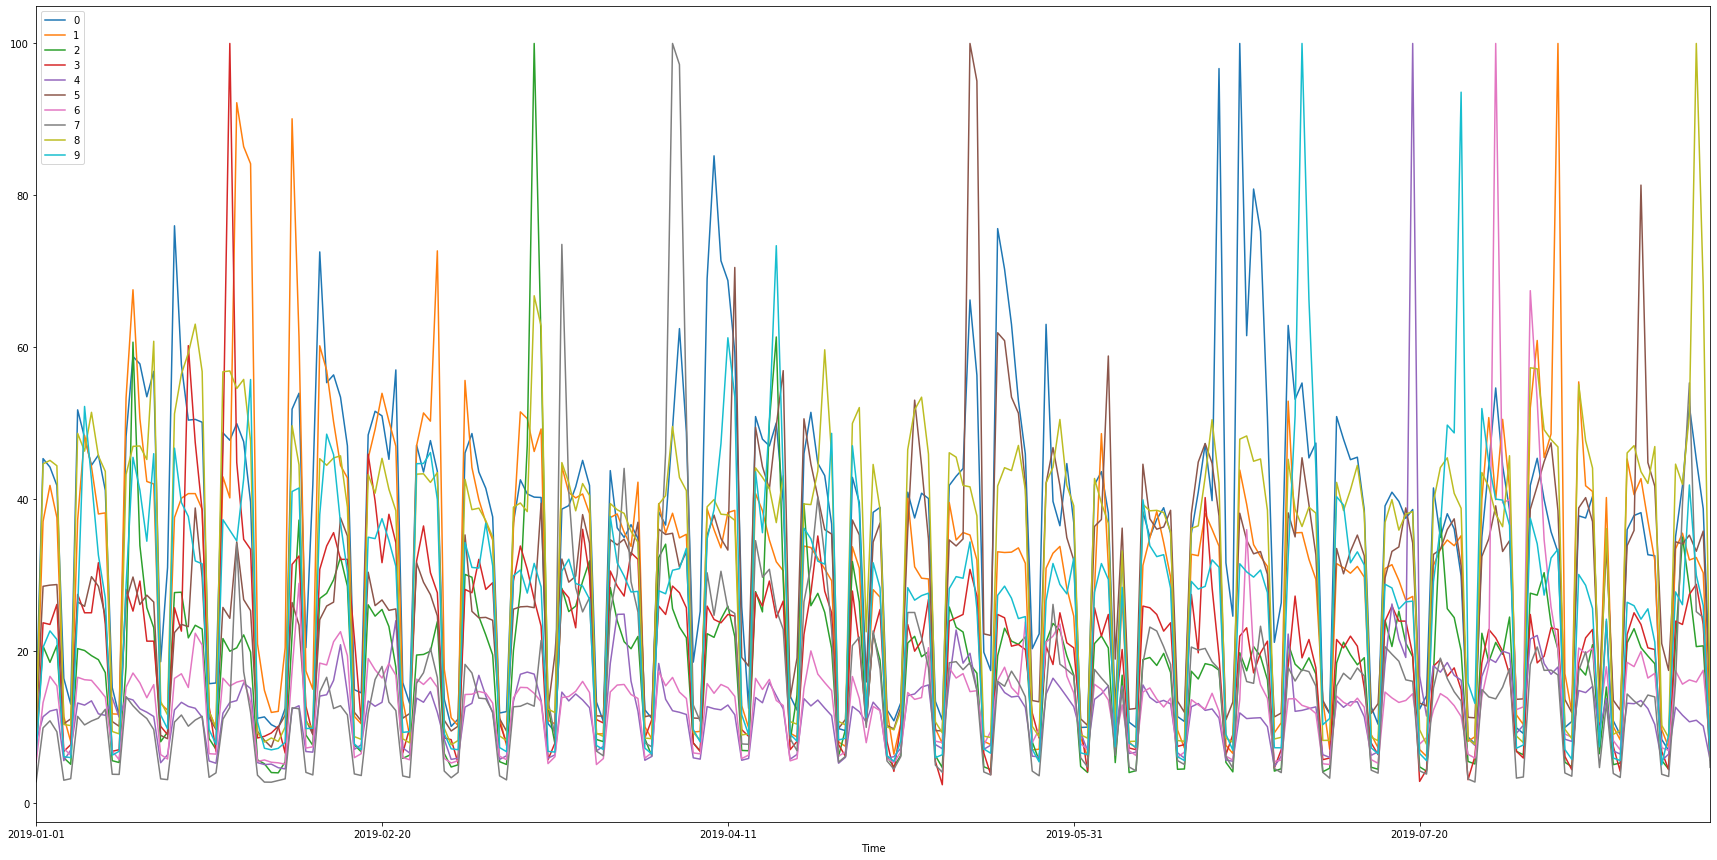

In [0]:
names = kp200_inform.회사명.values
data_new_10 = data_new[['Time', '0', '1','2','3','4','5','6','7','8','9']]
# '세아제강', '한일시멘트', 'SK케미칼', '동아타이어', '롯데제과', '오리온', '크라운제과', '한솔제지','삼성물산', '만도'
data_new_10.plot(x='Time',figsize = (30,15))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output10.png')

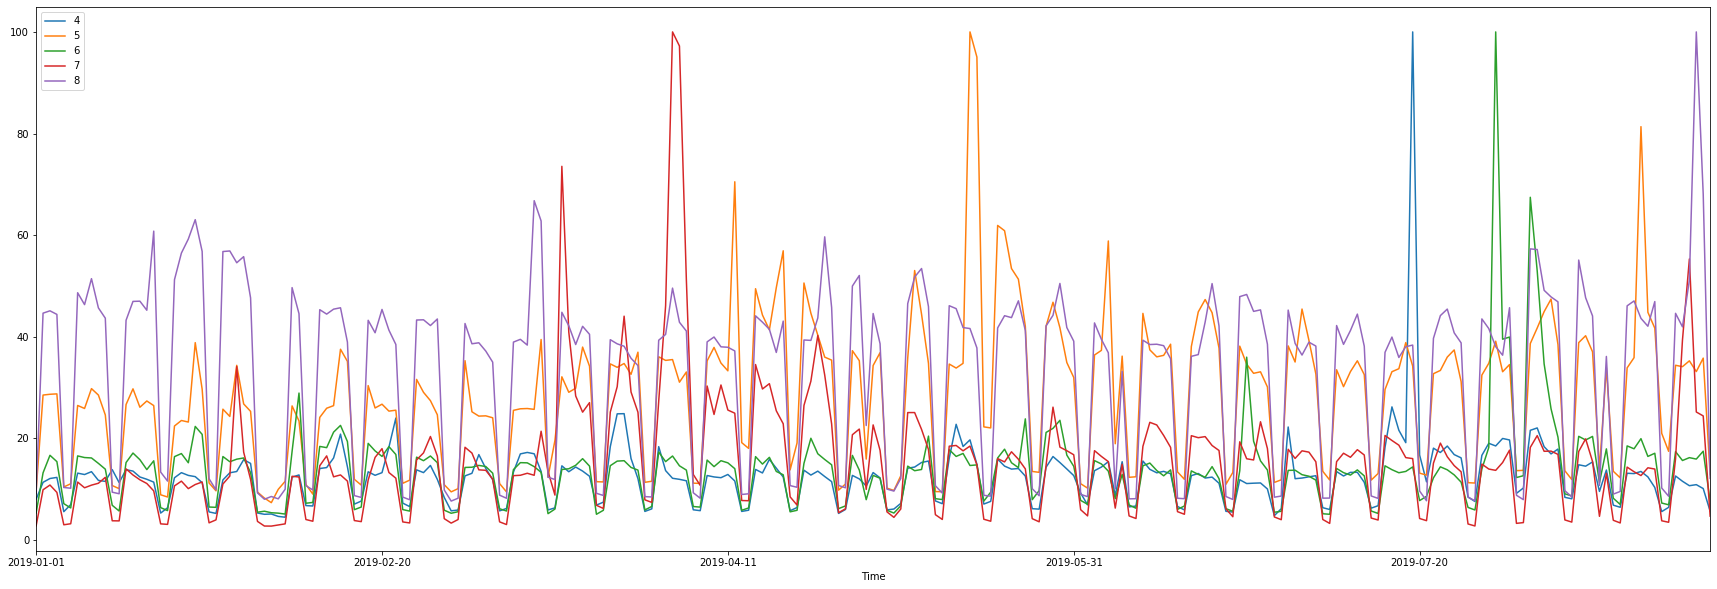

In [0]:
data_new_5 = data_new[['Time', '4','5','6','7','8']]
#'롯데제과', '오리온', '크라운제과', '한솔제지','삼성물산'
data_new_5.plot(x='Time',figsize = (30,10))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output5.png')

In [0]:
data_new.shape

(243, 157)

# Change rate 활용

In [0]:
trend_indexs = data_new[str(1)].values.tolist()
changes = []
for j in range(1,len(trend_indexs)):
  changes.append(trend_indexs[j]/trend_indexs[j-1]-1)
print(len(changes))
print(changes[:5])

242
[2.7393370521239153, 0.1280101496720616, -0.10112353640195781, -0.6974999720699964, -0.28925676519365673]


In [0]:
data_new_change_rate = pd.DataFrame()
data_new_change_rate['Time'] = data_new['Time'][1:]
for i in range(156):
  trend_indexs = data_new[str(i)].values.tolist()
  changes = []
  for j in range(1,len(trend_indexs)):
    changes.append(trend_indexs[j]/trend_indexs[j-1] - 1)
  data_new_change_rate[str(i)] = changes

In [0]:
data_new_change_rate.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
1,2019-01-02,2.584559,2.739337,1.717106,3.153850,0.413448,1.942634,1.477444,2.509959,3.884797,2.170025,2.555567,4.865386,1.744797,5.041158,4.811322,-0.533135,6.531816,3.229976,3.703141,1.972734,4.214712,3.352303,3.645967,2.978315,1.285483,6.382997,0.951398,2.433886,1.589172,2.997501,0.085560,4.528145,2.353448,3.653166,3.070314,1.097661,1.554279,3.636781,3.850996,...,4.562622,3.747494,3.821179,2.306941,3.002663,1.674012,0.659591,2.956791,3.441302,4.419793,3.487633,4.560000,1.334655,3.849060,2.373795,1.692309,1.853660,1.343882,2.572910,3.054396,1.573276,0.478699,3.543725,3.780266,5.616483,7.059420,5.363955,3.319844,1.185575,1.845506,8.238953,1.526066,-0.811314,0.577966,3.755555,4.686853,3.336366,0.752942,2.616989,1.788305
2,2019-01-03,-0.024615,0.128010,-0.103148,-0.009259,0.065789,0.005352,0.261001,0.094211,0.010318,0.105152,-0.090967,-0.030601,-0.005188,-0.079623,0.393669,0.086181,0.096476,0.128727,-0.076738,-0.050459,1.217711,-0.060802,-0.141039,-0.102508,0.177076,0.039769,-0.031705,-0.072503,0.001845,-0.131957,-0.033369,0.039533,-0.038561,0.054951,0.438991,-0.064743,0.066500,0.276059,-0.191923,...,0.032272,0.348732,0.034139,0.057991,0.306074,-0.008237,0.129560,0.258970,0.623782,0.113980,0.031307,0.302158,0.452502,0.190662,0.210924,-0.093877,0.029915,0.181368,-0.085253,0.012384,-0.051927,-0.038724,0.180956,-0.034132,0.170119,-0.012899,0.121428,-0.095419,0.030919,-0.112044,-0.058006,0.037524,-0.287007,-0.089449,0.009346,-0.003671,-0.046122,-0.102765,-0.132017,0.323013
3,2019-01-04,-0.054679,-0.101124,0.119870,0.112149,0.018043,0.002662,-0.074609,-0.133817,-0.015620,-0.049489,0.015315,-0.012401,-0.116727,0.059192,-0.166902,-0.010268,-0.092200,0.326290,-0.031791,0.054751,-0.372584,-0.121360,-0.088133,-0.039490,-0.082605,-0.054878,-0.087697,0.063574,-0.017802,0.096542,0.000000,0.004898,0.053476,-0.056730,-0.126334,-0.036038,0.100328,-0.040368,-0.115726,...,-0.084808,-0.034250,-0.120807,0.009919,-0.039786,0.016612,-0.117678,-0.118959,-0.078063,-0.139627,-0.178572,-0.099447,0.006131,-0.075163,-0.094569,0.130631,0.037344,-0.126095,-0.112631,0.161060,0.012368,-0.117950,-0.046269,0.034198,-0.129252,-0.004978,-0.216559,-0.151042,-0.037141,0.080045,-0.013014,0.036166,0.294786,-0.082803,-0.079861,-0.043110,0.092308,-0.014764,0.201416,-0.025436
4,2019-01-05,-0.607342,-0.697500,-0.712633,-0.739496,-0.546642,-0.636709,-0.535761,-0.679042,-0.766957,-0.716158,-0.693599,-0.799087,-0.666213,-0.817302,-0.330470,0.049373,-0.840759,-0.780928,-0.734952,-0.561833,-0.817187,-0.726275,-0.722369,-0.760911,-0.485048,-0.836950,-0.443991,-0.714852,-0.572500,-0.740473,-0.100594,-0.797018,-0.624366,-0.721159,-0.747874,-0.470682,-0.640818,-0.774961,-0.679669,...,-0.795816,-0.798701,-0.732089,-0.748781,-0.799045,-0.580882,-0.457717,-0.727848,-0.764285,-0.815375,-0.732608,-0.763804,-0.634649,-0.787986,-0.646104,-0.603586,-0.640000,-0.417175,-0.661676,-0.730466,-0.605585,-0.340885,-0.747289,-0.650592,-0.828626,-0.829268,-0.723579,-0.710915,-0.487088,-0.565620,-0.834700,-0.677138,-0.382272,-0.230502,-0.812579,-0.778976,-0.792757,-0.375750,-0.690099,-0.459999
5,2019-01-06,-0.206799,-0.289257,-0.142618,0.129032,0.248970,0.060543,-0.117647,0.067164,-0.013842,-0.021301,0.037207,-0.011363,0.146939,-0.200000,-0.587709,0.284297,-0.040799,-0.142246,-0.084417,0.188154,-0.086476,0.021886,-0.123603,-0.007937,0.037014,-0.118704,-0.103278,-0.070588,-0.038012,0.005064,0.018062,-0.024012,-0.263514,-0.215687,0.141869,-0.137707,0.049823,-0.192341,-0.164016,...,-0.225727,-0.129653,-0.104546,-0.010136,-0.041866,-0.031189,0.007522,-0.077520,-0.010807,-0.245550,-0.130087,-0.233767,0.015091,-0.300004,-0.144140,0.005026,-0.288889,-0.189978,-0.104360,-0.133550,-0.123893,0.043792,-0.105152,-0.266562,-0.199300,-0.26

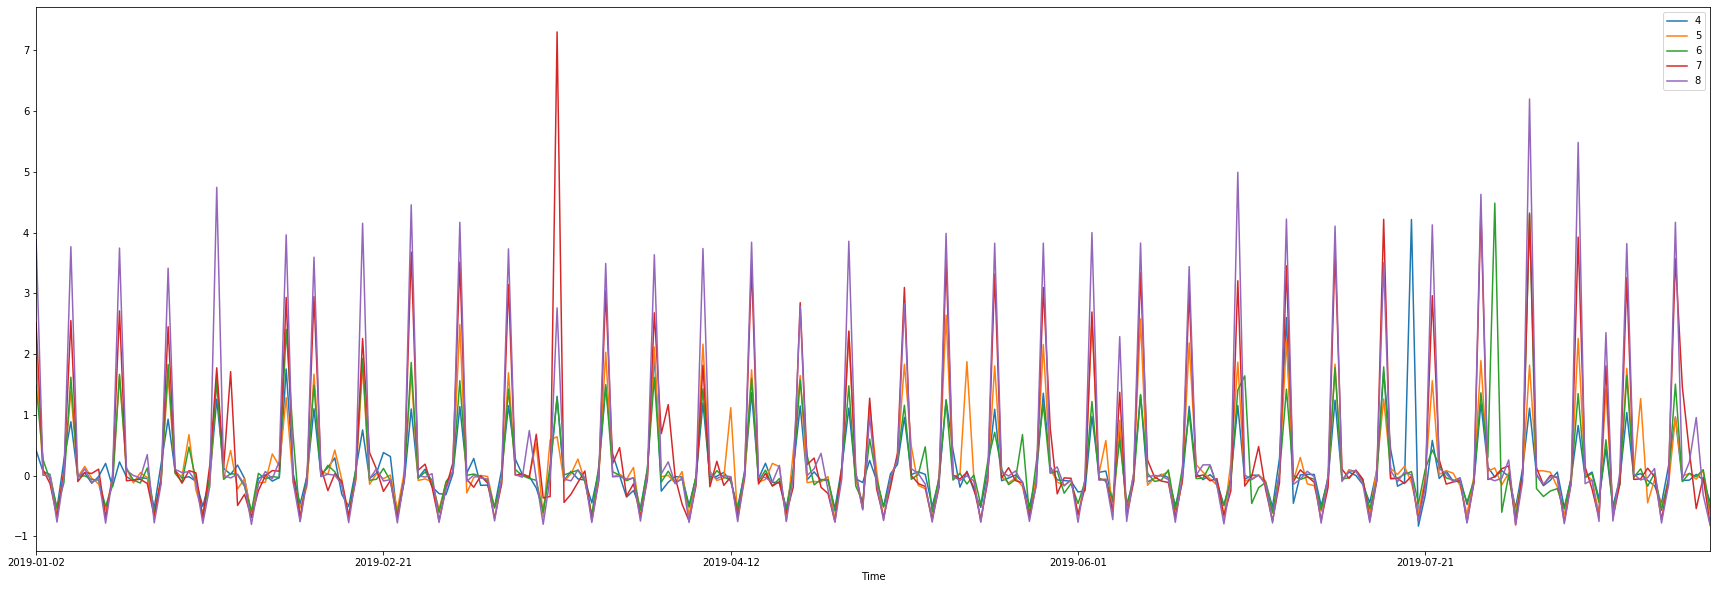

In [0]:
data_new_5 = data_new_change_rate[['Time', '4','5','6','7','8']]
#'롯데제과', '오리온', '크라운제과', '한솔제지','삼성물산'
data_new_5.plot(x='Time',figsize = (30,10))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output5_change_rate.png')

In [0]:
df_ch = data_new_change_rate.drop(['Time'],axis=1)
df_ch.shape
df_ch.values.shape # (242, 156)

df_ch_np = df_ch.to_numpy()
df_ch_np = df_ch_np.T
df_ch_np.shape # (156, 242)

(156, 242)

In [0]:
def cos_matrix_multiplication(matrix, vector):
    """
    Calculating pairwise cosine distance using matrix vector multiplication.
    """
    dotted = matrix.dot(vector)
    matrix_norms = np.linalg.norm(matrix, axis=1)
    vector_norm = np.linalg.norm(vector)
    matrix_vector_norms = np.multiply(matrix_norms, vector_norm)
    neighbors = np.divide(dotted, matrix_vector_norms)
    return neighbors

In [0]:
from tqdm import tqdm
wl = []
for i in tqdm(range(len(df_ch_np)),mininterval = 3):
    nearest = list(cos_matrix_multiplication(df_ch_np, df_ch_np[i]).argsort()[-11:-1][::-1])
    li = []
    for x in nearest:
        li.append(x)
    wl.append(li)
wl =  np.asarray(wl)
print(wl.shape)
#np.save(directory+'article_similarity_recent_t',wl)

100%|██████████| 156/156 [00:00<00:00, 3594.72it/s]

(156, 10)


In [0]:
wl[4]
names[4]

array([ 42,  34,  12,  39,  95,  80,  46,  47, 108, 147])

In [0]:
for i in range(156):
  print('company name : ',names[i],end="'s ")
  print('most similarly company are :', end = ' ')
  for j in wl[i]:
    print(names[j], end= ' ')
  print()

company name :  세아제강's most similarly company are : 한화생명 아이에스동서 한국항공우주 삼성SDI 삼성전기 대한전선 기업은행 남해화학 삼성증권 LG상사 
company name :  한일시멘트's most similarly company are : 한화생명 삼성물산 현대미포조선 삼성생명 삼성증권 기업은행 부광약품 삼성SDI 에스원 한화케미칼 
company name :  SK케미칼's most similarly company are : KB금융 삼성전기 한일시멘트 LS 신한지주 삼성SDI 한화생명 기업은행 한올바이오파마 삼성생명 
company name :  동아타이어's most similarly company are : SKC LG하우시스 S-Oil 한국항공우주 이수화학 한화생명 두산인프라코어 KB금융 삼성전기 한올바이오파마 
company name :  롯데제과's most similarly company are : 롯데쇼핑 LG이노텍 GS리테일 삼성카드 SK텔레콤 에스원 유니드 GS 삼성증권 롯데푸드 
company name :  오리온's most similarly company are : 에스원 LG하우시스 삼성생명 한화생명 삼성증권 KB금융 SK텔레콤 삼성카드 삼성SDI 제일기획 
company name :  크라운제과's most similarly company are : 삼성전자 일양약품 고려아연 대한유화 롯데쇼핑 에스원 롯데케미칼 아이에스동서 삼성물산 무학 
company name :  한솔제지's most similarly company are : GS건설 LG이노텍 SK텔레콤 한화생명 삼성생명 기업은행 롯데쇼핑 신한지주 일양약품 현대미포조선 
company name :  삼성물산's most similarly company are : 삼성증권 일양약품 한화생명 삼성전자 삼성생명 부광약품 대한전선 삼성전기 기업은행 GS건설 
company name :  만도's most similarly company

In [0]:
# Let's do the clustering for Stock Portfolio

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

In [0]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

In [0]:
df_ch_np.shape

(156, 242)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(df_ch_np)
y_kmeans = kmeans.predict(df_ch_np)

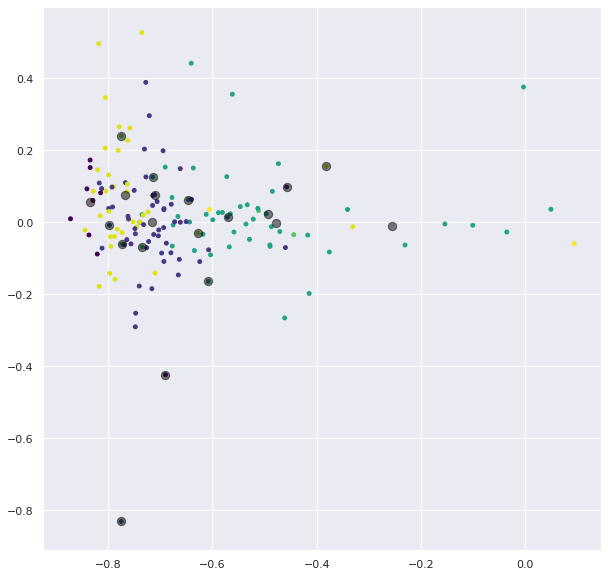

In [0]:
fig = plt.subplots(figsize=(10,10))
plt.scatter(df_ch_np[:, 3], df_ch_np[:, 7], c=y_kmeans, s=15, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 7], c='black', s=70, alpha=0.5);

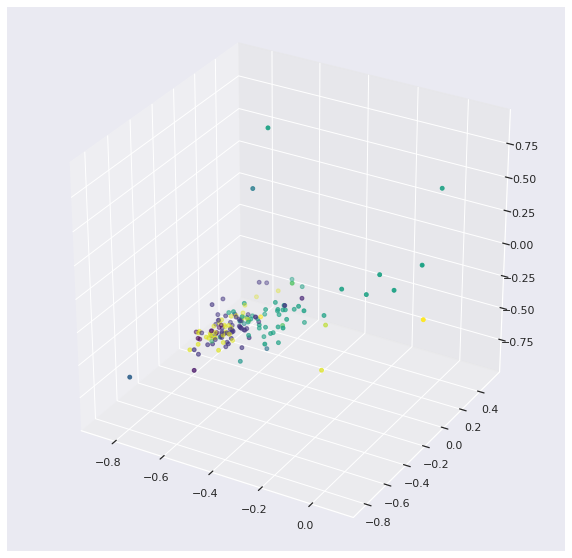

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_ch_np[:, 3], df_ch_np[:, 7],df_ch_np[:,80], c=y_kmeans, s=15, cmap='viridis')

#centers = kmeans.cluster_centers_
#ax.scatter(centers[:, 3], centers[:, 7],df_ch_np[:,80], c='black', s=70, alpha=0.5);

In [0]:
y_kmeans

array([ 3,  3,  3,  3, 11, 11, 11,  3,  3,  3,  3,  3, 11, 18, 18, 11,  0,
       18, 12, 11,  3,  3,  3,  3, 11,  0, 14,  3, 11,  3, 11, 18,  3,  3,
        3, 11, 11,  6,  3, 11, 15, 11, 11,  3, 18, 14, 11, 11,  3,  3, 11,
        3, 11, 18, 11, 16, 11,  9, 18, 18, 11,  3, 18, 18, 11,  3,  3,  3,
       18, 11, 18,  3, 18, 11,  3, 18,  5,  0, 11, 11, 11,  0, 13, 11, 11,
        3, 18, 18, 11, 10,  3, 11, 18,  3,  0, 11, 11,  3,  3, 18,  3,  3,
       11, 18,  0,  7, 18, 18,  3, 11,  3, 18,  3,  3, 19, 18, 18, 18,  3,
        3, 18, 11,  2,  3,  3, 18, 18, 18, 11, 18,  8, 11,  3, 11,  3,  3,
       19, 11,  3,  3, 18,  0, 18,  4, 11, 11,  0, 11, 17, 11,  3, 18,  3,
       11,  1,  3], dtype=int32)

In [0]:
# https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_ch_np)
    Sum_of_squared_distances.append(km.inertia_)

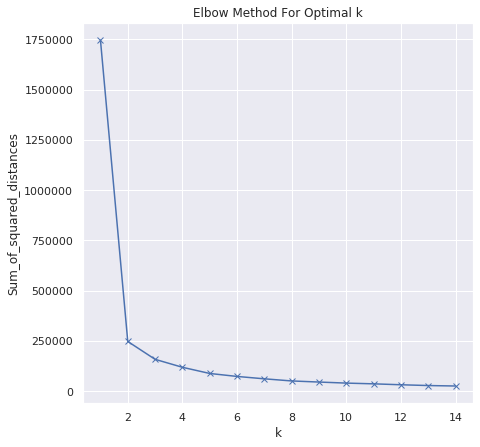

In [0]:
K = range(1,15)
fig = plt.figure(figsize=(7,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')

plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
#https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
from sklearn.metrics import silhouette_score

sil = [] 
for k in range(2, 14+1):
  kmeans = KMeans(n_clusters = k).fit(df_ch_np)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_ch_np, labels, metric = 'euclidean'))

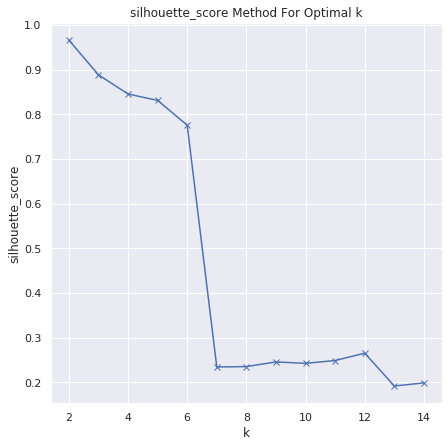

In [0]:
K = range(2,14+1)
fig = plt.figure(figsize=(7,7))
plt.plot(K, sil, 'bx-')

plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('silhouette_score Method For Optimal k')
plt.show()